# Generating data for the next notebook ...

In [1]:
import pandas as pd

In [2]:
!du -sch ../Data/Suburbs\ to\ Postcodes\ to\ Suburbs.xlsx

3.1M	../Data/Suburbs to Postcodes to Suburbs.xlsx
3.1M	total


In [3]:
filename = '../Data/Suburbs to Postcodes to Suburbs.xlsx'

In [5]:
!conda install --yes xlrd

Fetching package metadata .................
Solving package specifications: .

Package plan for installation in environment /Users/schofield/anaconda/envs/bayesml:

The following NEW packages will be INSTALLED:

    xlrd: 1.0.0-py36_0



In [7]:
pd.ExcelFile(filename).sheet_names

['Postcodes to Suburbs',
 'Suburbs to Postcodes',
 'PostCodes2SuburbSource',
 'Suburbs2PostcodesSource',
 'Suburb Population',
 'Postcode Population']

In [77]:
postcode_populations = pd.read_excel(filename, sheetname='Postcode Population')

In [78]:
def clean(s, datatype=int):
    try:
        return datatype(s)
    except:
        return np.nan

In [79]:
postcode_populations['Postcode'] = postcode_populations['Postcode'].apply(clean)
postcode_populations['Population'] = postcode_populations['Population'].apply(clean)

In [80]:
postcode_populations = postcode_populations.dropna()

In [81]:
postcode_populations.set_index(postcode_populations['Postcode'].astype(int), inplace=True)

In [82]:
del postcode_populations['Postcode']

In [84]:
postcode_populations['Population'] = postcode_populations['Population'].astype(int)

In [87]:
postcode_populations.to_hdf('postcode_populations.h5', key='postcode_populations')

In [88]:
!du -sch postcode_populations.h5

 48K	postcode_populations.h5
 48K	total


In [90]:
postcode_populations[:5]

,Population
Postcode,
2000,22758
2006,1155
2007,7111
2008,6296
2009,11617


In [107]:
postcode_populations['Population'].loc[2000]

22758

In [97]:
postcode_populations.index

Int64Index([2000, 2006, 2007, 2008, 2009, 2010, 2011, 2015, 2016, 2017,
            ...
            6798, 6799, 2540, 2618, 2620, 3585, 3644, 4383, 4825,  872],
           dtype='int64', name='Postcode', length=2513)

In [122]:
postcode_populations.quantile(0.1)

Population    371.0
Name: 0.1, dtype: float64

In [123]:
freq = np.ones(10000) * 500

In [115]:
ind = postcode_populations.index.values

In [117]:
len(ind)

2513

In [118]:
len(postcode_populations)

2513

In [124]:
freq[postcode_populations.index] = postcode_populations.values

/Users/schofield/anaconda/envs/bayesml/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: assignment will raise an error in the future, most likely because your index result shape does not match the value array shape. You can use `arr.flat[index] = values` to keep the old behaviour.
  """Entry point for launching an IPython kernel.


In [134]:
freq[[2000, 2001]] = 200000

In [135]:
freq[[3000, 3001]] = 170000

In [136]:
freq[[4000, 4001]] = 120000

In [137]:
freq[[5000, 5001]] = 80000

In [138]:
freq[[6000, 6001]] = 60000

In [139]:
freq[[7000, 7001]] = 50000

In [162]:
freq[[2001, 3001, 4001, 5001, 6001, 7001]] *= 1.2

In [163]:
samplespace = np.arange(10000)

In [164]:
freq /= freq.sum()

In [165]:
from numpy.random import choice
postcodes_sample = choice(samplespace, size=10**6, p=freq)

np.save('../Data/postcodes_sample.npy', postcodes_sample)

In [166]:
import matplotlib.pyplot as plt

In [167]:
%matplotlib inline

In [168]:
np.count_nonzero(postcodes_sample == 2000)

7578

In [169]:
np.count_nonzero(postcodes_sample == 2001)

9107

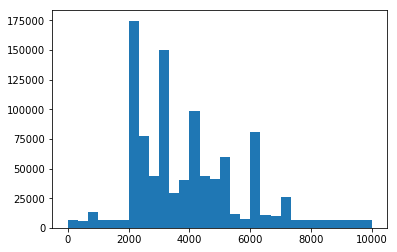

In [170]:
plt.hist(postcodes_sample, bins=30);